<h2>Data Preprocessing</h2>

In this module, we move on to the task of data preprocessing to fix issues that we determined from the preliminary analisys.

We continue with the students data, however with a few changes
- 1000 students
- Missing data presents

The attributes are the same
- StudentID
- FirstName
- LastName
- Major
- HighSchoolGPA
- AvgDailyStudyTime
- TotalAbsence (of the first semester)
- FamilyIncome
- State
- **FirstYearGPA**
- **isGRA**

Remember to connect the notebook to a folder in your drive storing the data file

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/IT7143\ Module\ 4

Mounted at /content/drive
/content/drive/MyDrive/IT7143 Module 4


In [2]:
import pandas as pd

In [3]:
students = pd.read_csv('students1000.csv')
students

,StudentID,FirstName,LastName,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence,FirstYearGPA,isGRA
0,202303595,Baxter,Dengler,Computer Science,2.82,45013,WA,2.01,14.0,1.93,0
1,202309162,Christian,Wickey,Data Science,3.07,128358,GA,5.41,NaN,2.76,0
2,202306337,Lonnie,Wulff,Software Engineering,2.68,112392,GA,9.57,13.0,3.09,0
3,202306072,Mitchell,Deshotel,Software Engineering,3.21,190846,GA,8.57,16.0,3.08,0
4,202301733,Linwood,Willing,Information Technology,3.44,187163,GA,6.24,20.0,2.73,0
...,...,...,...,...,...,...,...,...,...,...,...
995,202302372,Michael,Richman,Computer Science,4.00,32210,SC,8.84,16.0,3.31,1
996,202309892,Lacy,Anton,Software Engineering,3.02,163481,GA,6.61,17.0,2.53,0
997,202308310,Ell,Benke,Software Engineering,2.05,45446,GA,3.68,30.0,1.77,0
998,202305648,Elzie,Enderle,Information Technology,2.19,44714,GA,2.74,17.0,2.11,0


Like before, always look at the dataframe general information first

In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          1000 non-null   int64  
 1   FirstName          1000 non-null   object 
 2   LastName           1000 non-null   object 
 3   Major              1000 non-null   object 
 4   HighSchoolGPA      1000 non-null   float64
 5   FamilyIncome       1000 non-null   int64  
 6   State              982 non-null    object 
 7   AvgDailyStudyTime  985 non-null    float64
 8   TotalAbsence       990 non-null    float64
 9   FirstYearGPA       1000 non-null   float64
 10  isGRA              1000 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 86.1+ KB


Notice the columns that have non-null counts less than total number of entries. They include missing values and we need to address that later.

<h3>Train Test Splitting</h3>

Machine learning models are mostly developed for predictive purpose. That means models should be able to handle new/future data that they have never seen.

During development of models though, we do not have future data. One workaround is to split the whole data we have into two parts, one for model training, and one acts as new/future data for testing and evaluation purpose only.

We first split the target(s) from the features. We only consider FirstYearGPA at this point. 

We also drop any ID and name columns from data at this point. 

Then we use train_test_split in sklearn.model_selection to perform the train test splitting

In [5]:
features = students.drop(['StudentID','FirstName','LastName','FirstYearGPA','isGRA'], axis=1)
labels = students['FirstYearGPA']

In [6]:
features

,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence
0,Computer Science,2.82,45013,WA,2.01,14.0
1,Data Science,3.07,128358,GA,5.41,NaN
2,Software Engineering,2.68,112392,GA,9.57,13.0
3,Software Engineering,3.21,190846,GA,8.57,16.0
4,Information Technology,3.44,187163,GA,6.24,20.0
...,...,...,...,...,...,...
995,Computer Science,4.00,32210,SC,8.84,16.0
996,Software Engineering,3.02,163481,GA,6.61,17.0
997,Software Engineering,2.05,45446,GA,3.68,30.0
998,Information Technology,2.19,44714,GA,2.74,17.0


In [7]:
labels

0      1.93
1      2.76
2      3.09
3      3.08
4      2.73
       ... 
995    3.31
996    2.53
997    1.77
998    2.11
999    2.94
Name: FirstYearGPA, Length: 1000, dtype: float64

Usually, we use X to refer to features and y labels. In this case, we name the training features trainX, testing feature testX, training labels trainY, and testing labels testY

train_test_split will generate all four sets for use. test_size decides the ratio of testing set (0.2 mean 20% data are in the testing sets)

In [11]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(features, labels, test_size=0.2)

In [12]:
trainX

,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence
484,Data Science,2.63,29748,GA,4.74,29.0
198,Computer Science,2.67,149038,AL,3.24,23.0
221,Computer Science,2.42,36224,TN,7.36,30.0
302,Information Technology,3.93,25619,GA,8.04,12.0
288,Software Engineering,3.28,84711,AL,5.70,11.0
...,...,...,...,...,...,...
671,Information Technology,2.47,94456,GA,7.60,21.0
902,Data Science,3.32,244510,GA,7.64,12.0
195,Software Engineering,3.62,44148,TN,5.80,20.0
145,Information Technology,2.64,53744,SC,1.84,22.0


In [13]:
testX

,Major,HighSchoolGPA,FamilyIncome,State,AvgDailyStudyTime,TotalAbsence
511,Computer Science,3.80,312743,FL,10.40,23.0
992,Computer Science,3.28,286692,GA,8.83,19.0
895,Computer Science,2.87,25462,SC,4.43,8.0
878,Data Science,3.15,132167,GA,6.34,15.0
279,Information Technology,2.67,119922,AL,7.12,15.0
...,...,...,...,...,...,...
758,Data Science,3.22,247707,GA,6.45,23.0
379,Data Science,2.24,43238,GA,2.81,15.0
380,Software Engineering,2.46,113345,SC,4.92,23.0
387,Software Engineering,2.11,148651,AL,5.62,25.0


In [14]:
trainY

484    2.13
198    1.95
221    2.17
302    3.26
288    2.58
       ... 
671    3.04
902    3.17
195    2.45
145    1.88
833    2.34
Name: FirstYearGPA, Length: 800, dtype: float64

In [15]:
testY

511    3.33
992    3.13
895    2.39
878    2.72
279    2.88
       ... 
758    2.71
379    2.00
380    2.61
387    2.36
255    2.83
Name: FirstYearGPA, Length: 200, dtype: float64

From now, any analysis will be done on training sets. Testing sets are left unchanged until all models are final to evaluate them

<h3>Processing Numeric Columns</h3>

<h4>Handling Outliers</h4>

Let us examine the histograms again. 

The first issue we may want to deal with is outliers. Take a look at the FamilyIncome, there is almost no data pass 0.6 million $, but the plot extends to about 4 millions. This is due to extreme and very rare values, or **outliers**

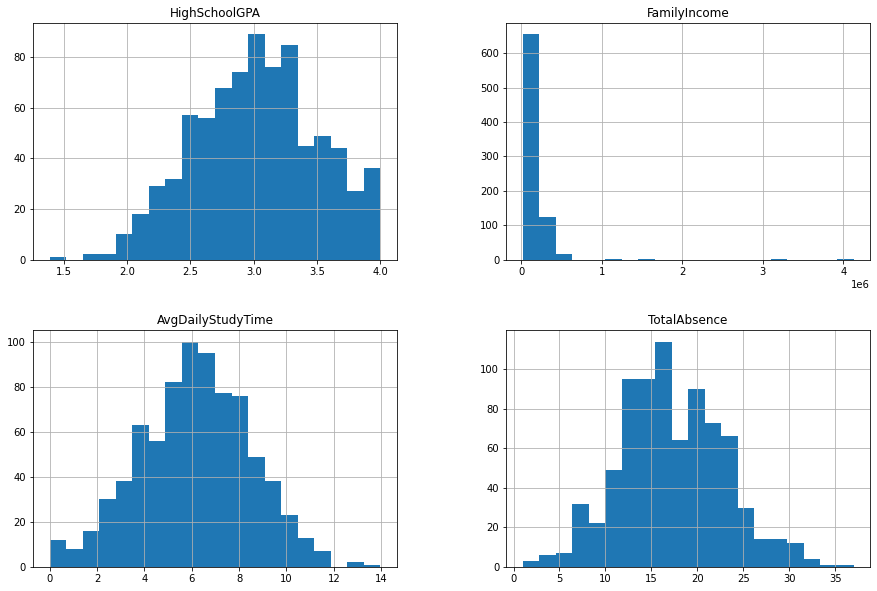

In [16]:
import matplotlib.pyplot as plt

trainX.hist(bins=20, figsize=(15,10))
plt.show()

A common way to deal with outliers is to **clip** them. Specifically, we can choose a threshold so any extreme values will be set to be equal to the threshold.

We use **numpy.clip()** for this.

First, import numpy with an alias np. We will examine an example first

In [17]:
import numpy as np

In [22]:
test_array = np.array([-1000, -10, 5, 2, 1, -8, 4, -1, 8, 1031, 2004])
test_array

array([-1000,   -10,     5,     2,     1,    -8,     4,    -1,     8,
        1031,  2004])

In [24]:
clipped_array = np.clip(test_array, test_array.min(), 10)
clipped_array

array([-1000,   -10,     5,     2,     1,    -8,     4,    -1,     8,
          10,    10])

numpy.clip takes three inputs, first is the array, second the lower bound, and third the upper bound. Notice that any values outside of either bound will be set to the limit values.

Back to analytics, it is common to choose the lower bound of a column as -4*sd and upper bound 4*sd, with sd being the column's standard deviation
- Standard deviation represents how much values of a column deviate from the mean (average) and can be obtained with np.std

First we obtain the standard deviation of FamilyIncome.

Then we use clip to fix the outliers. Also note that, we should create another copy of the data to process instead of make direct changes to it.

In [25]:
trainX_prc = trainX.copy()

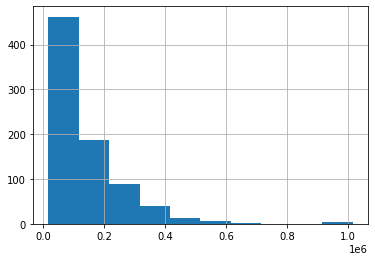

In [30]:
FamilyIncomeSD = trainX['FamilyIncome'].std()
FamilyIncomeMean = trainX['FamilyIncome'].mean()
trainX_prc['FamilyIncome'] = np.clip(trainX['FamilyIncome'], FamilyIncomeMean - *FamilyIncomeSD, FamilyIncomeMean + 4*FamilyIncomeSD)
trainX_prc['FamilyIncome'].hist()
plt.show()

<h4>Skewed Distributions</h4>

In general we want columns to be symmetrically distributed. Slightly skewed is okay, however, too skewed distribution should be fixed.

Let us examine the histograms again
- HighSchoolGPA and AvgDailyStudyTime are slightly skewed and are both okay
- TotalAbsense seems symmetric enough
- FamilyIncome is very right-skewed

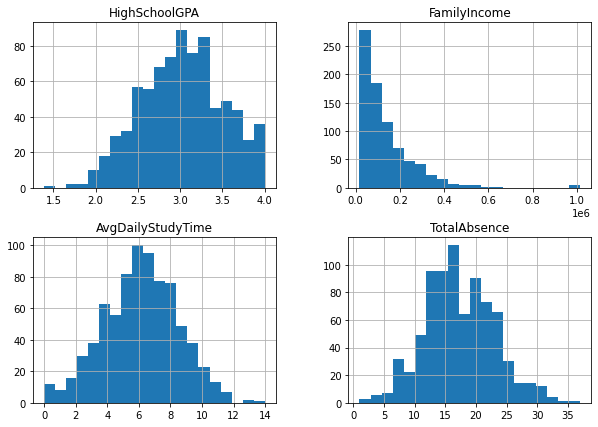

In [41]:
trainX_prc.hist(bins=20, figsize=(10,7))
plt.show()

Skewed distributions can be address with a log transformation. We use numpy.log(). Also note that we create a new column to store the log version of FamilyIncome. 

We can keep the old version as well since machine learning methods are more robust (in statistics, the old version should be removed)

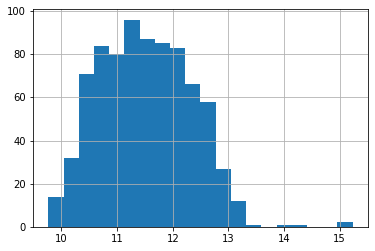

In [43]:
trainX_prc['FamilyIncomeLog'] = np.log(trainX['FamilyIncome'])
trainX_prc['FamilyIncomeLog'].hist(bins=20)
plt.show()

The distribution looks much better after transformation. The few extreme values are still there, but they are not too far from the population, so we can leave them

<h4>Standardization</h4>

Another potential issue is the high differences among the ranges of numeric columns. Some models can handle them while some cannot. 


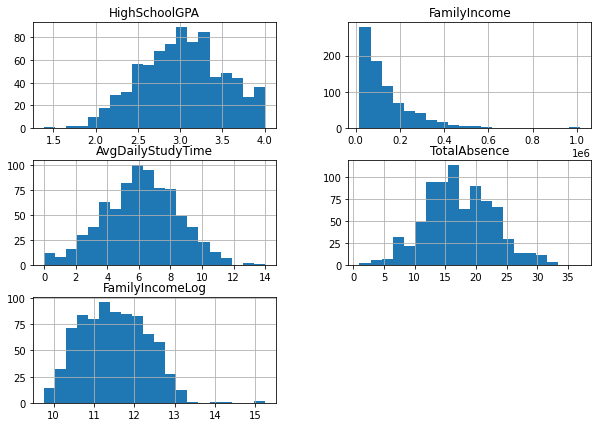

In [44]:
trainX_prc.hist(bins=20, figsize=(10,7))
plt.show()

In [ ]:
trainX_prc.boxplot(rot=20)
plt.show()

A very easy fix is to standardize the data - transform so that the columns have mean of 0 and standard deviation of 1.

In pandas, we can subtract the means from the dataframe then dividing everything by the standard deviations

Note that we need to slice to the numeric columns to make change

In [ ]:
num_cols = ['HighSchoolGPA','FamilyIncome','AvgDailyStudyTime','TotalAbsence','FamilyIncomeLog']

trainX_prc[num_cols] = (trainX_prc[num_cols] - trainX_prc[num_cols].mean()) / trainX_prc[num_cols].std()
trainX_prc.boxplot(rot=20)
plt.show()


As can be seen, all numeric columns now are in the same range.

<h4>Missing Data</h4>

Missing data is a major issue if they present. Most models cannot handle missing values and will just drop rows with them which will bias the analysis.

A common strategy is to replace the missing data with their columns' median. Note that if the amount of missing values in a column is too much (e.g., above 15-20%) then it is better to drop it.

In pandas, we use dataframe.fillna().

First, examine how much missing data is in the training features

Similarly like before, we need to slice to the numeric columns only

In [ ]:
trainX_prc.info()

In [ ]:
trainX_prc[num_cols] = trainX_prc[num_cols].fillna(trainX_prc[num_cols].median())
trainX_prc.info()

<h4>Categorical Columns</h4>

Categorical columns have some similar issues with numeric columns, i.e., rare values and missing values

<h4>Rare Categorical Values</h4>

Rare categorical values are not useful because they likely cannot represent their whole class. One way to deal with them is to create an "Other" category for anything rare.

First, let check the bar charts of categorical columns 

In [ ]:
cat_cols = ['Major', 'State']

for col in cat_cols:
    trainX_prc[col].value_counts().plot.bar(rot=20)
    plt.title(col)
    plt.show()

Major is fine, however, State has two values (WA and NY) that are rares. We can group them into "Other".

In [ ]:
trainX_prc.loc[trainX_prc['State'].isin(['WA','NY']), 'State'] = 'Other'
trainX_prc['State'].value_counts().plot.bar()

<h4>Missing Values</h4>

Missing values can be put into a new category, for example, "Missing". We also use fillna() for this process

In [ ]:
trainX_prc['State'] = trainX_prc['State'].fillna('Missing')
trainX_prc['State'].value_counts().plot.bar()

In [ ]:
trainX_prc.info()

<h4>One Hot Encoding</h4>

Very few models can directly use class attributes. In this method, we create a new <b>binary</b> column for <b>each distinct value</b> in the class column. This means, a class column that has three values, for example, (low, medium, high), will result in three new binary columns. Here, binary means the columns only have two distinct value, 0 and 1. The value is 1 when the row belong to the corresponding class of the column, and 0 otherwise. For example

|Class|         
|-----|
|low|
|medium|
|low|
|low|
|high|
|medium|

is changed into

|isLow|isMedium|isHigh|
|-----|--------|------|
|1|0|0|
|0|1|0|
|1|0|0|
|1|0|0|
|0|0|1|
|0|1|0|

As you can see, rows that have class of low have the new attribute class_low of 1, and the rest being 0. Similarly for rows in medium class, and high class.

with Pandas, we use get_dummies() to quickly generate one hot codes for categorical columns

First, make sure only class columns have types object

Then, use get_dummies() to replace class columns with their one hot codes

In [ ]:
trainX_prc.info()

In [ ]:
trainX_prc = pd.get_dummies(trainX_prc)
trainX_prc

The training set is now processed and fixed with all the detectable issues. All columns are also transformed into numeric.

<h3>Processing the Testing Set</h3>

The testing set also needs to be processed so models can work on them. However, be careful not to estimate anything in the testing sets, such as medians or standard deviations. We use the training sets to estimate them already.


In [ ]:
testX_prc = testX.copy()
testX_prc['FamilyIncome'] = np.clip(testX_prc['FamilyIncome'], -4*FamilyIncomeSD, 4*FamilyIncomeSD)     #notice how we do not recalculate FamilyIncomeSD here
testX_prc['FamilyIncomeLog'] = np.log(testX_prc['FamilyIncome'])
testX_prc[num_cols] = (testX_prc[num_cols] - trainX_prc[num_cols].mean()) / trainX_prc[num_cols].std()  #notice how we use the trainX_prc mean() and std() here
testX_prc[num_cols] = testX_prc[num_cols].fillna(trainX_prc[num_cols].median())                         #notice how we use the trainX_prc median here
testX_prc.loc[testX_prc['State'].isin(['WA','NY']), 'State'] = 'Other'
testX_prc['State'] = testX_prc['State'].fillna('Missing')
testX_prc = pd.get_dummies(testX_prc)

testX_prc


We can further write a function to avoid repeating codes. 

We can also use SKLearn pipeline which will be introduced next module.